In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sympy import *
from IPython.display import display

init_printing(use_unicode=True)

# The terms in the expansions of the generating functions $\widetilde U,\widetilde V$

In [ ]:
# model parameters
alpha, lam, beta, gamma, tau, z = var('\\alpha, \\lambda_k, \\beta, \\gamma, \\tau, z')

# 2nd moment matrix C
c11, c12, c22 = var('c11, c12, c22')
C = Matrix([[c11,c12],[c12,c22]])

# Compute C2 = (1-zA_\lambda)C 
R1 = Matrix([[1-alpha*lam, beta],[-alpha*lam, beta]])
R2 = Matrix([[1,0],[1,0]])
C1 = R1*C*R1.T-tau*gamma*alpha**2*lam**2*R2*C*R2.T
C2 = C-z*C1
C2

⎡        ⎛        2                2                                          
⎢c₁₁ - z⋅⎝- \alpha ⋅\gamma⋅\lambdaₖ ⋅\tau⋅c₁₁ + \beta⋅(\beta⋅c₂₂ + c₁₂⋅(-\alph
⎢                                                                             
⎢              ⎛        2                2                                    
⎣      c₁₂ - z⋅⎝- \alpha ⋅\gamma⋅\lambdaₖ ⋅\tau⋅c₁₁ + \beta⋅(-\alpha⋅\lambdaₖ⋅

                                                                              
a⋅\lambdaₖ + 1)) + (-\alpha⋅\lambdaₖ + 1)⋅(\beta⋅c₁₂ + c₁₁⋅(-\alpha⋅\lambdaₖ +
                                                                              
                                                                            ⎞ 
c₁₂ + \beta⋅c₂₂) + (-\alpha⋅\lambdaₖ + 1)⋅(-\alpha⋅\lambdaₖ⋅c₁₁ + \beta⋅c₁₂)⎠ 

    ⎞          ⎛        2                2                                    
 1))⎠  c₁₂ - z⋅⎝- \alpha ⋅\gamma⋅\lambdaₖ ⋅\tau⋅c₁₁ - \alpha⋅\lambdaₖ⋅(\beta⋅c
                                                  

$\widetilde U$

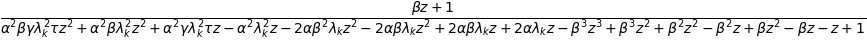

In [ ]:
# Equate C2 to [[1,1],[1,1]] and solve for c11
U = simplify(solve([C2[0,0]-1, C2[0,1]-1, C2[1,1]-1], (c11, c12, c22))[c11])
U

$\widetilde V$

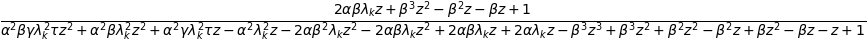

In [ ]:
# Equate C2 to [[1,0],[0,0]] and solve for c11
V = simplify(solve([C2[0,0]-1, C2[0,1], C2[1,1]], (c11, c12, c22))[c11])
V

Extracting the numerators and the denominator $S$

In [ ]:
Unum, Udenom = fraction(U)
Vnum, Vdenom = fraction(V)
assert Udenom-Vdenom == 0
S_ = Udenom
print ('Numerator in U terms:')
display(Unum)
print ('\nNumerator in V terms:')
display(Vnum)
print ('\nDenominator S:')
display(S_)

Numerator in U terms:



Numerator in V terms:



Denominator S:


$\gamma$ and $\tau$ appear in $S$ only as a product $\gamma\tau$:

In [ ]:
S = S_.subs({gamma*tau:gamma})
S

# Monotonicity and positivity
## Verification of condition $S> 0$ 

In [ ]:
# simplify notation for brevity
a, b, g = var('a, b, g')
Sa = S.subs({alpha*lam: a, beta:b, gamma:g})
display(Sa)
print(Sa)

a**2*b*g*z**2 + a**2*b*z**2 + a**2*g*z - a**2*z - 2*a*b**2*z**2 - 2*a*b*z**2 + 2*a*b*z + 2*a*z - b**3*z**3 + b**3*z**2 + b**2*z**2 - b**2*z + b*z**2 - b*z - z + 1


Definitions for REDUCE/Redlog:

`S := a**2*b*g*z**2 + a**2*b*z**2 + a**2*g*z - a**2*z - 2*a*b**2*z**2 - 2*a*b*z**2 + 2*a*b*z + 2*a*z - b**3*z**3 + b**3*z**2 + b**2*z**2 - b**2*z + b*z**2 - b*z - z + 1`

The condition for REDUCE/Redlog to be determined as FALSE: 

`W := ex({a,b,g,z}, -1<b and b<1 and 0<a and a<2*(b+1) and 0<=g and g<=1 and 0<z and z<1 and S<=0)`


### Experimental demonstration of $S>0$

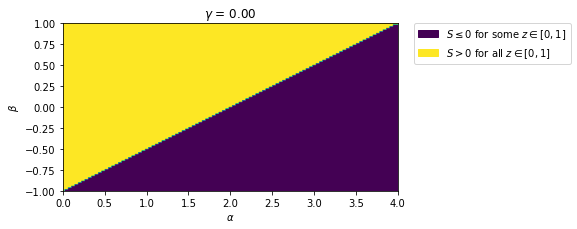

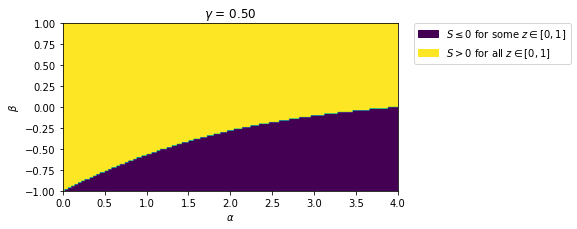

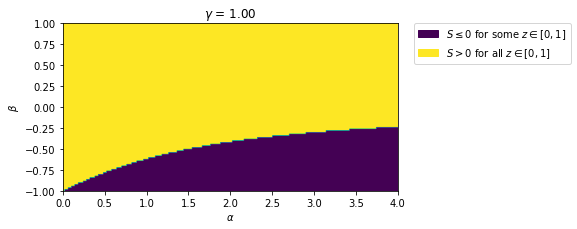

In [ ]:
import matplotlib.patches as mpatches

fS = lambdify([alpha, beta, gamma, lam, z], S, 'numpy')
z_ = np.linspace(0,1,100)
alphaA = np.linspace(0,4,200)
betaA = np.linspace(-1,1,100)
gammaA = np.linspace(0,1,3)
res = np.zeros((len(gammaA),len(alphaA),len(betaA)))
extent = np.min(alphaA), np.max(alphaA), np.min(betaA), np.max(betaA)

for n_gamma, gamma_ in enumerate(gammaA):
    plt.figure()
    for n_alpha, alpha_ in enumerate(alphaA):
        for n_beta, beta_ in enumerate(betaA):
            res[n_gamma, n_alpha, n_beta] = np.prod(fS(alpha_, beta_, gamma_, 1, z_) > 0)
 
    plt.xlabel('$\\alpha$')
    plt.ylabel('$\\beta$')
    plt.title('$\\gamma$ = %.2f' %gamma_)
    im = plt.imshow(res[n_gamma].T, extent=extent, origin='lower')
    colors = [im.cmap(im.norm(value)) for value in [0, 1]]
    patches = [mpatches.Patch(color=colors[0], label="$S\leq 0$ for some $z\in[0,1]$"),
               mpatches.Patch(color=colors[1], label="$S>0$ for all $z\in[0,1]$"),
               ]
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

plt.show()

### $S$ at $\lambda=0$

In [ ]:
factor(S.subs({lam:0}))

## Monotonicity of $z\widetilde U(z)$
Consider the derivative $\tfrac{d}{dz}(z\widetilde U(z))$:

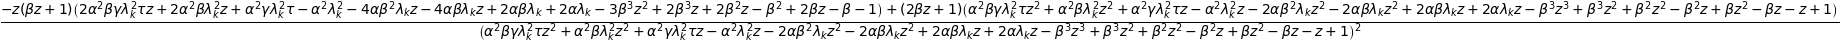

In [ ]:
dzu = simplify(diff(z*U, z))
display(dzu)

The denominator of this expression is $S^2>0$, so we only need to check that the numerator is nonnegative.  

In [ ]:
dzuNum, dzuDenom = fraction(dzu) 
assert simplify(dzuDenom-S_**2) == 0  
R = simplify(dzuNum)
display(R)
print_latex(R)

- 2 \alpha^{2} \beta \lambda_{k}^{2} z^{2} + 4 \alpha \beta^{2} \lambda_{k} z^{2} + 4 \alpha \beta \lambda_{k} z^{2} + \beta^{4} z^{4} + 2 \beta^{3} z^{3} - 2 \beta^{3} z^{2} - 2 \beta^{2} z^{2} - 2 \beta z^{2} + 2 \beta z + 1


In [ ]:
# simplify notation for convenience
R1 = simplify(R.subs({alpha*lam: a, beta:b, gamma:g}))
display(R1)
print (R)

-2*\alpha**2*\beta*\lambda_k**2*z**2 + 4*\alpha*\beta**2*\lambda_k*z**2 + 4*\alpha*\beta*\lambda_k*z**2 + \beta**4*z**4 + 2*\beta**3*z**3 - 2*\beta**3*z**2 - 2*\beta**2*z**2 - 2*\beta*z**2 + 2*\beta*z + 1


Definitions for REDUCE/Redlog:

`R1 := -2*a**2*b*z**2 + 4*a*b**2*z**2 + 4*a*b*z**2 + b**4*z**4 + 2*b**3*z**3 - 2*b**3*z**2 - 2*b**2*z**2 - 2*b*z**2 + 2*b*z + 1`

The condition for REDUCE/Redlog to be determined as FALSE: 

`W1 := ex({a,b,z}, -1<b and b<1 and 0<a and a<2*(b+1) and 0<z and z<1 and R1<0)`

### Experimental demonstration of $\tfrac{d}{dz}(z\widetilde U(z))\ge 0$

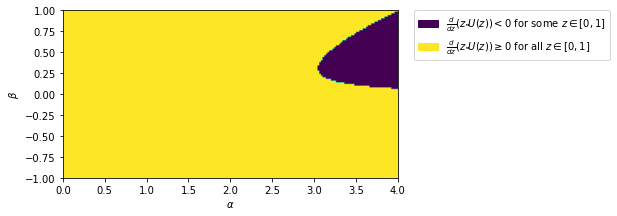

In [ ]:
import matplotlib.patches as mpatches

fR = lambdify([alpha, beta, lam, z], R, 'numpy')
z_ = np.linspace(0,1,100)
alphaA = np.linspace(0,4,200)
betaA = np.linspace(-1,1,100)
res = np.zeros((len(alphaA),len(betaA)))
extent = np.min(alphaA), np.max(alphaA), np.min(betaA), np.max(betaA)

plt.figure()
for n_alpha, alpha_ in enumerate(alphaA):
    for n_beta, beta_ in enumerate(betaA):
        res[n_alpha, n_beta] = np.prod(fR(alpha_, beta_, 1, z_) >= 0)

plt.xlabel('$\\alpha$')
plt.ylabel('$\\beta$')

im = plt.imshow(res.T, extent=extent, origin='lower')
colors = [im.cmap(im.norm(value)) for value in [0, 1]]
patches = [mpatches.Patch(color=colors[0], label=r"$\frac{d}{dz}(z\widetilde U(z))< 0$ for some $z\in[0,1]$"),
            mpatches.Patch(color=colors[1], label=r"$\frac{d}{dz}(z\widetilde U(z))\geq 0$ for all $z\in[0,1]$"),
            ]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

plt.show()

# Manipulations with $S, \widetilde U, \widetilde V$

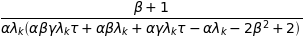

In [ ]:
factor(U.subs({z:1}))